## K Means algrithm of IRIS Dataset

### What is the K-Means Algorithm?
The K-Means Algorithm is an unsupervised machine learning algorithm used for clustering data into a specified number of groups (clusters). It aims to partition the data points into k clusters such that the points within each cluster are more similar to each other than to points in other clusters. This similarity is typically measured using metrics like Euclidean distance. K-Means is widely used in pattern recognition, data mining, and image segmentation.

### Steps of the K-Means Algorithm:
#### 1) Initialize Centroids:
Select k random points from the dataset as the initial cluster centroids.

#### 2) Assign Points to Clusters:
For each data point, calculate its distance from each centroid using a distance metric (e.g., Euclidean distance). Assign the point to the cluster with the nearest centroid.

#### 3) Update Centroids:
After assigning all points to clusters, calculate the new centroids by averaging the data points in each cluster.

#### 4) Repeat Until Convergence:
Repeat steps 2 and 3 until the centroids no longer change significantly or the maximum number of iterations is reached.

#### 5) Evaluate the Clustering:
Use metrics such as the Elbow Method (distortion vs. k plot) or Silhouette Score to determine the quality of clustering and the optimal number of clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop(['Species'],axis=1,inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
model = KMeans(n_clusters=3)


In [6]:
model.fit(df)

KMeans(n_clusters=3)

In [7]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

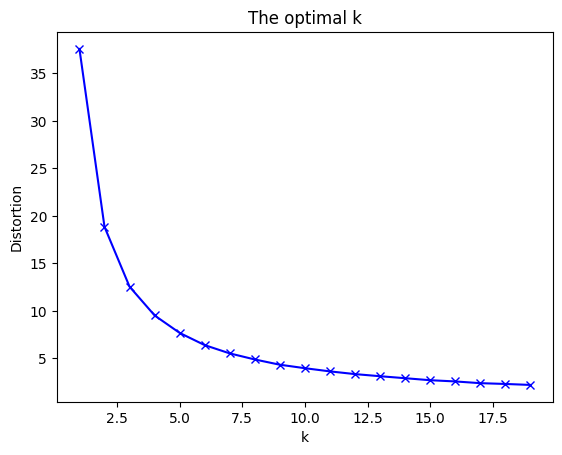

In [8]:
distortions = []
K = range(1,20)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The optimal k')
plt.show()

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [10]:
model.cluster_centers_

array([[136.5       ,   6.46666667,   2.98333333,   5.45      ,
          1.86666667],
       [ 30.5       ,   5.125     ,   3.5375    ,   1.5125    ,
          0.2375    ],
       [ 85.5       ,   5.9125    ,   2.825     ,   4.3625    ,
          1.375     ],
       [ 55.        ,   6.2       ,   2.88888889,   4.42222222,
          1.37777778],
       [112.5       ,   6.53      ,   2.94      ,   5.5       ,
          2.06      ],
       [ 15.        ,   5.22222222,   3.63333333,   1.41111111,
          0.24444444],
       [  5.5       ,   4.86      ,   3.31      ,   1.45      ,
          0.22      ],
       [122.        ,   6.86666667,   2.95555556,   5.83333333,
          2.        ],
       [ 70.5       ,   5.95      ,   2.7125    ,   4.425     ,
          1.3625    ],
       [103.        ,   6.14444444,   2.85555556,   5.17777778,
          1.85555556],
       [ 46.5       ,   4.9125    ,   3.4375    ,   1.5125    ,
          0.2875    ],
       [142.        ,   6.62      ,   3.04 

In [11]:
km=KMeans(n_clusters=3)
km.fit(df)
ym=km.predict(df)
center=km.cluster_centers_
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
tdf=pd.DataFrame(data=center,columns=df.columns)


In [13]:
tdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,25.0,5.006122,3.420408,1.465306,0.244898
1,125.0,6.570588,2.970588,5.523529,2.011765
2,74.5,5.922000,2.780000,4.206000,1.304000


In [14]:
com_df=pd.concat([df,tdf])

In [15]:
df_norm=StandardScaler().fit_transform(com_df)

In [16]:
pca = PCA(n_components=2)
trans_pc = pca.fit_transform(df_norm)

In [17]:
trans_pc[:-3].shape

(150, 2)

In [18]:
trans_pc[-3:]

array([[-2.51377569,  0.2842477 ],
       [ 2.04322741,  0.24822033],
       [ 0.38119528, -0.53176162]])

In [19]:
pc_df=pd.DataFrame(data = trans_pc[:-3], columns = ['pc1', 'pc2'])
pc_df['Cluster']=km.labels_

In [20]:
pc_df.head()

,pc1,pc2,Cluster
0,-2.821573,0.503713,0
1,-2.647092,-0.661040,0
2,-2.883132,-0.327684,0
3,-2.814000,-0.585315,0
4,-2.886134,0.669697,0


In [21]:
first=pc_df[pc_df.Cluster==0]
second=pc_df[pc_df.Cluster==1]
third=pc_df[pc_df.Cluster==2]

In [22]:
center_df=pd.DataFrame(data = trans_pc[-3:], columns = ['pc1', 'pc2'])
center_df

,pc1,pc2
0,-2.513776,0.284248
1,2.043227,0.248220
2,0.381195,-0.531762


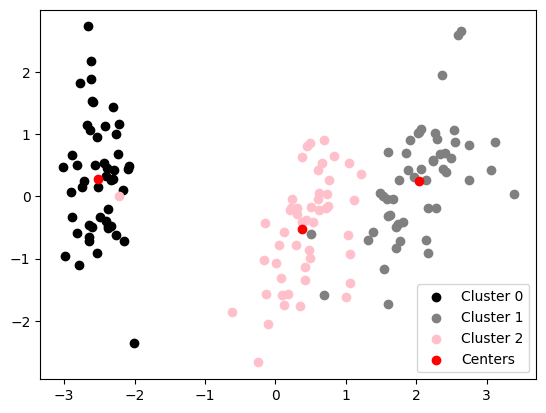

In [23]:
plt.scatter(x=first.pc1,y=first.pc2,color='black',label='Cluster 0')
plt.scatter(x=second.pc1,y=second.pc2,color='gray',label='Cluster 1')
plt.scatter(x=third.pc1,y=third.pc2,color='pink',label='Cluster 2')
plt.scatter(x=center_df.pc1,y=center_df.pc2,color='red',label='Centers')
plt.legend()
plt.show()

In [24]:
print(f'Silhouette Score(n=3): {silhouette_score(df, ym)}')

Silhouette Score(n=3): 0.5816702617893469
